# 根据all_tweets产生的数据结果进行分析

In [2]:
from my_weapon import *
from collections import defaultdict, Counter
from IPython.display import display
from tqdm import tqdm_notebook as tqdm
import matplotlib
from datetime import datetime

sns.set(style="darkgrid", font_scale=1.5)
sns.set_palette("coolwarm", 8)
ira_c = sns.color_palette("coolwarm", 10)[9]
all_c = sns.color_palette("coolwarm", 10)[0]

TOP hostnames

In [18]:
ht_count = Counter()

for line in tqdm(open("disk/all_tweets_withURL.json")):
    ht_count[json.loads(line)["final_hostname"]] += 1
    break

In [19]:
for ht, c in ht_count.most_common():
    if c > 100:
        print(ht, c, sep=",", file=open("hostname_cnt.csv", "a"))

# Load all tweets

In [18]:
print("loading all tweets_csv ...")
%time all_tweets = pd.read_csv("disk/all-tweets.csv", dtype=str)
# all_tweets = all_tweets.astype(
#     {"is_IRA": int, "is_source": int, "dt": datetime})
all_tweets = all_tweets.astype({"is_IRA": int, "is_source": int})
print("finished!")

loading all tweets_csv ...
CPU times: user 52.2 s, sys: 3.24 s, total: 55.5 s
Wall time: 1min
finished!


In [19]:
len(all_tweets)

36232050

In [20]:
len(all_tweets[all_tweets.is_source==1])

11059347

In [21]:
non_tweets = all_tweets[all_tweets.is_IRA==0]
len(non_tweets)

36170276

In [22]:
ira_tweets = all_tweets[all_tweets.is_IRA==1]
len(ira_tweets)

61774

In [23]:
fake_tweets = all_tweets[all_tweets.c_alex=="fake"]

In [24]:
print(len(fake_tweets[(fake_tweets.is_IRA==1) & (fake_tweets.is_source==1)]), \
len(fake_tweets[(fake_tweets.is_IRA==1) & (fake_tweets.is_source==0)]))

print(len(fake_tweets[(fake_tweets.is_IRA==0) & (fake_tweets.is_source==1)]), \
len(fake_tweets[(fake_tweets.is_IRA==0) & (fake_tweets.is_source==0)]))

908 1987
1419955 2521951


In [51]:
labels = [
    "fake",
    "extreme bias (right)",
    "right",
    "right leaning",
    "center",
    "left leaning",
    "left",
    "extreme bias (left)",
#     "local"
]

In [52]:
sns.set_style("darkgrid")
sns.set_palette("coolwarm_r", n_colors=8)

# media_type_counts = tweets["c_alex"].value_counts(normalize=True)
media_type_counts = non_tweets["c_alex"].value_counts()
display(media_type_counts)

left leaning            8627664
center                  6946011
left                    4737216
right                   4549287
extreme bias (right)    4457023
fake                    3941906
right leaning           1167901
wiki                     691264
extreme bias (left)      644571
local                    243594
radio                     96714
auto                      47260
black                     13243
military                   6193
Arabic                      391
Syria                        38
Name: c_alex, dtype: int64

In [54]:
media_type_counts_normalized = non_tweets["c_alex"].value_counts(normalize=True)
display(media_type_counts_normalized)

left leaning            0.238529
center                  0.192036
left                    0.130970
right                   0.125774
extreme bias (right)    0.123223
fake                    0.108982
right leaning           0.032289
wiki                    0.019111
extreme bias (left)     0.017820
local                   0.006735
radio                   0.002674
auto                    0.001307
black                   0.000366
military                0.000171
Arabic                  0.000011
Syria                   0.000001
Name: c_alex, dtype: float64

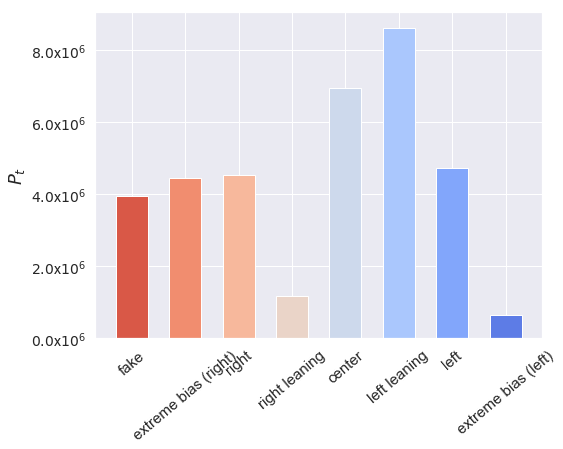

In [58]:
from matplotlib.ticker import FuncFormatter

# plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(figsize=(8, 6))
# x = range(len(media_type_counts))
x = range(8)

for i in x:
    plt.bar(i, media_type_counts[labels[i]], width=0.6)
    
plt.xticks(x, [labels[i] for i in x])
# plt.xlabel("IRAs", fontsize=18)
plt.ylabel("$P_t$")
plt.xticks(rotation=40, fontsize=15)

def formatnum(x, pos):
    return '$%.1f$x$10^{6}$' % (x/1000000)
formatter = FuncFormatter(formatnum)
ax.yaxis.set_major_formatter(formatter)
plt.yticks(fontsize=14)

plt.savefig("fig/Pt-all.pdf", dpi=300, bbox_inches='tight')

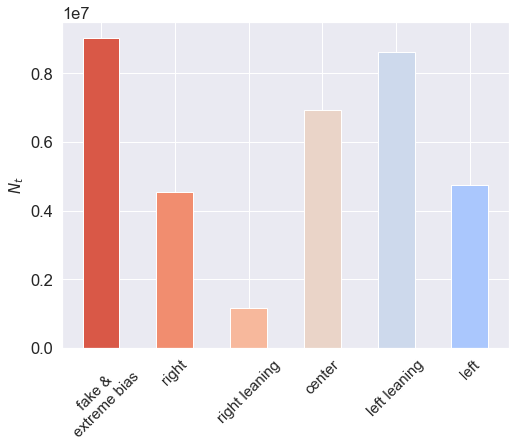

In [63]:
fig, ax = plt.subplots(figsize=(8, 6))
x = range(6)

for i in x:
    if i == 0:
        plt.bar(i, media_type_counts[labels[0]] + media_type_counts[labels[1]]
                    + media_type_counts[labels[7]], width=0.5)
    else:
        plt.bar(i, media_type_counts[labels[i + 1]], width=0.5)

new_labels = ["fake &\nextreme bias", "right", "right leaning", "center", "left leaning", "left"]
plt.xticks(x, new_labels)
# plt.xlabel("IRAs", fontsize=18)
plt.ylabel('$N_{t}$', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
# plt.yticks(fontsize=14)

plt.savefig("fig/Nt-all.pdf", dpi=300, bbox_inches='tight')

In [64]:
# tweets = ira_tweets[ira_tweets.c_alex!="-1"]
# media_type_counts = tweets["c_alex"].value_counts(normalize=True)
media_type_counts = ira_tweets["c_alex"].value_counts()
display(media_type_counts)

local                   26689
left leaning             6293
right                    5423
center                   4989
radio                    3686
fake                     2895
extreme bias (right)     2883
left                     2671
right leaning            2164
black                    1602
auto                      963
Syria                     731
military                  287
wiki                      221
Arabic                    167
extreme bias (left)       110
Name: c_alex, dtype: int64

In [65]:
# media_type_counts = ira_tweets["c_alex"].value_counts(normalize=True)
# media_type_counts

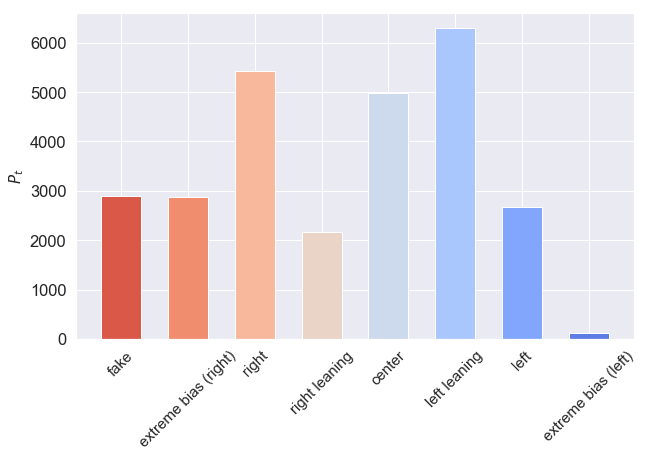

In [66]:
plt.figure(figsize=(10, 6))
x = range(8)

for i in x:
    plt.bar(i, media_type_counts[labels[i]], width=0.6)
    
plt.xticks(x, [labels[i] for i in x])
# plt.xlabel("IRAs", fontsize=18)
plt.ylabel('$P_{t}$', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
# plt.yticks(fontsize=14)

plt.savefig("fig/Pt-ira.pdf", dpi=300, bbox_inches='tight')

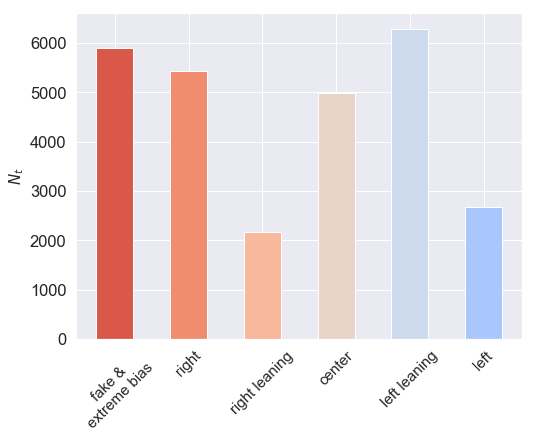

In [68]:
plt.figure(figsize=(8, 6))
x = range(6)

for i in x:
    if i == 0:
        plt.bar(i, media_type_counts[labels[0]] + media_type_counts[labels[1]]
                    + media_type_counts[labels[7]], width=0.5)
    else:
        plt.bar(i, media_type_counts[labels[i + 1]], width=0.5)

new_labels = ["fake &\nextreme bias", "right", "right leaning", "center", "left leaning", "left"]
plt.xticks(x, new_labels)
# plt.xlabel("IRAs", fontsize=18)
plt.ylabel('$N_{t}$', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
# plt.yticks(fontsize=14)

plt.savefig("fig/Nt-ira.pdf", dpi=300, bbox_inches='tight')

## IRA作为源，或者参与到其中的消息是否更加爆炸？

In [20]:
ira_as_source = ira_tweets[ira_tweets.is_source == 1]

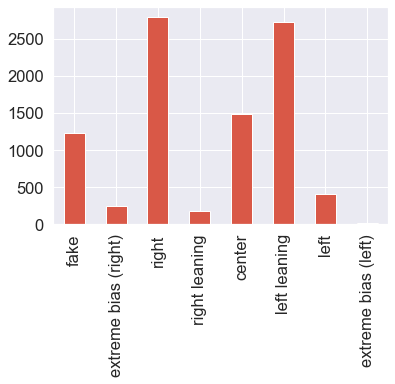

In [78]:
pd.Series(ira_as_source.c_alex.value_counts(), index=[labels[i] for i in range(len(labels))]).plot("bar")

IRA作为源的新闻，被转发多少次

In [44]:
tweets_count = all_tweets.groupby("retweeted_id").count().tweet_id

In [17]:
len(ira_as_source)

7544

In [ ]:
import sys, traceback

media_len_ret = Counter()

for _, row in tqdm(ira_as_source.iterrows()):
    try:
        tweet_id = row["tweet_id"]
        c = int(tweets_count[tweets_count.index==tweet_id].values)
    except:
        c = 0
        # traceback.print_exc()
        
    media_len_ret[row.c_alex] += c

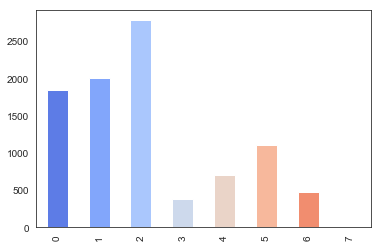

In [17]:
pd.Series(dict_media_len_ret, index=[str(i) for i in range(8)]).plot("bar")

In [18]:
URL_count = all_tweets.URL.value_counts()

7345it [00:01, 7173.16it/s]


0    351.173469
1    944.808525
2    588.846596
3    572.043689
4    237.193947
5    544.730479
6    235.702247
7    107.436170
dtype: float64

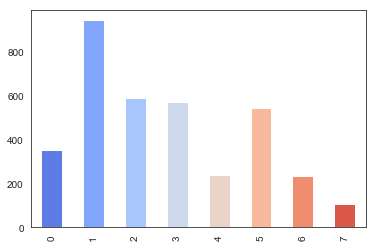

0     412980
1    1440833
2     717804
3     117841
4     384017
5     432516
6     167820
7      10099
dtype: int64

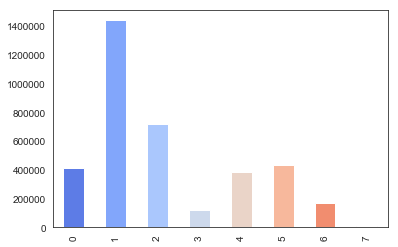

In [19]:
dict_media_len_ret = defaultdict(list)

for _, row in tqdm(IRA_tweets.iterrows()):
    c = int(URL_count[row.URL])
    dict_media_len_ret[row.media_type].append(c)

_ave = {k: sum(v) / len(v) for k, v in dict_media_len_ret.items()}
_sum = {k: sum(v) for k, v in dict_media_len_ret.items()}

d = pd.Series(_ave, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

d = pd.Series(_sum, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

7345it [00:00, 13289.07it/s]


0    216.328990
1    924.779412
2    374.208145
3    250.130435
4    483.034188
5     97.679104
6    253.585366
7    109.384615
dtype: float64

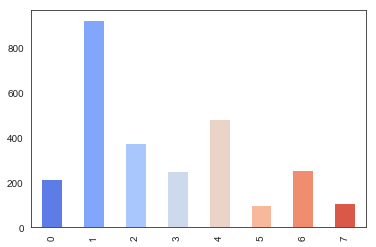

0     66413
1    125770
2     82700
3      5753
4     56515
5     26178
6     20794
7      1422
dtype: int64

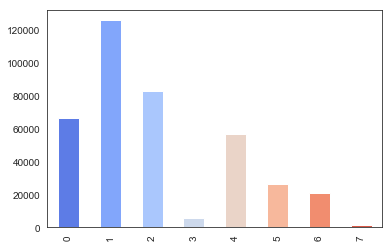

In [20]:
dict_media_len_ret = defaultdict(list)

for _, row in tqdm(IRA_tweets.iterrows()):
    if row.is_source == 1:
        c = int(URL_count[row.URL])
        dict_media_len_ret[row.media_type].append(c)

_ave = {k: sum(v) / len(v) for k, v in dict_media_len_ret.items()}
_sum = {k: sum(v) for k, v in dict_media_len_ret.items()}

d = pd.Series(_ave, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

d = pd.Series(_sum, index=[str(i) for i in range(8)])
display(d)
d.plot("bar")
plt.show()
plt.close()

为了作为对比，所有的URL又是什么情况呢？

 # Loading all-users.csv ... ... !!!

!! Already coded in the all_tweets.py for making all-users.csv

In [15]:
labels = [
    "fake",
    "extreme bias (right)",
    "right",
    "right leaning",
    "center",
    "left leaning",
    "left",
    "extreme bias (left)",
    "local",
]

# labels = [str(i) for i in range(9)]

In [16]:
# all_users = pd.read_csv("data/all-users-mbfc.csv", index_col="user_id", dtype={"user_id": str})
all_users = pd.read_csv("data/all-users.csv", index_col="user_id", dtype={"user_id": str})
print(len(all_users))
# change the type
# f_labels = [map_labels[k] for k in map_labels]
all_users = all_users.astype({"is_IRA": int})

for label in labels:
    # print(label)
    all_users = all_users.astype({label: int,
                                  label + "_source": int})
#                                   label + "_source_rate": float})

2516728


## Overlap between fake and left

分析IRA到底在选举期间的作用

In [20]:
IRA_users = all_users[all_users.is_IRA > 0]
len(IRA_users)

360

In [21]:
non_users = all_users[all_users.is_IRA == 0]
len(non_users)

2516368

In [97]:
IRA_users.to_csv("data/IRA-users-20190619.csv")

In [98]:
IRA_users.fake.describe()

count    360.000000
mean       8.041667
std       36.799857
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max      409.000000
Name: fake, dtype: float64

In [99]:
IRA_u = IRA_users[labels]

In [100]:
len(IRA_u)

360

In [ ]:
IRA_u.loc[:, "fake+right"] = IRA_u["fake"] + IRA_u["extreme bias (right)"] + IRA_u["right"] + \
    IRA_u["right leaning"] + IRA_u["extreme bias (left)"]

In [62]:
IRA_u.loc[:, "center+left"] = IRA_u["center"] + IRA_u["left leaning"]

In [63]:
IRA_u.loc[:, "fake+extreme"] = IRA_u["fake"] + IRA_u["extreme bias (right)"]

In [64]:
IRA_u.loc[:, "fake/left"] = np.log((IRA_u["center+left"] + 1)) - np.log((IRA_u["fake+extreme"] + 1))

In [ ]:
IRA_u.sort_values("fake+extreme", ascending=False)[:25]

In [ ]:
IRA_u.sort_values("center+left", ascending=False)[:25]

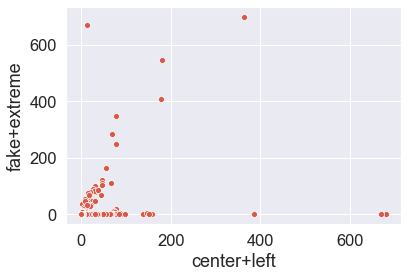

In [68]:
sns.scatterplot(x="center+left", y="fake+extreme", data=IRA_u)
# plt.title("Number of IRA's tweets corresponding to media categories")
# plt.xscale("log")
# plt.yscale("log")

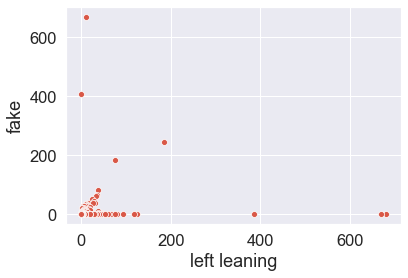

In [69]:
sns.scatterplot(x="left leaning", y="fake", data=IRA_u)
# plt.xscale("log")
# plt.yscale("log")

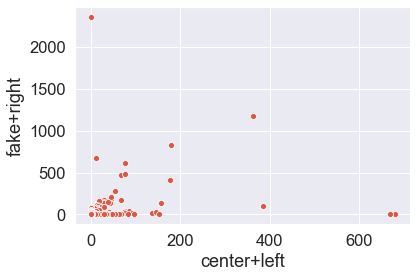

In [70]:
sns.scatterplot(x="center+left", y="fake+right", data=IRA_u)
# plt.xscale("log")
# plt.yscale("log")

In [ ]:
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

IRA_u['log1'] = np.log(IRA_u["center+left"] + 1)
IRA_u['log2'] = np.log(IRA_u["fake"] + 1)
sns.jointplot(x="log1", y="log2", data=IRA_u, kind="hex", color="#4CB391")

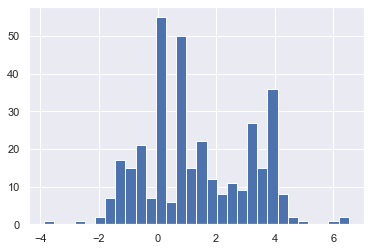

In [72]:
IRA_u["fake/left"].hist(bins=30)

In [17]:
labels = [
    "fake",
    "extreme bias (right)",
    "right",
    "right leaning",
    "center",
    "left leaning",
    "left",
    "extreme bias (left)",
    "local"
]

In [22]:
def get_big_table(_users):
    big_table = []

    for lab in labels:
        volume = int(_users[lab].sum()) # 某种媒体上总和
        source_volume = int(_users[lab + "_source"].sum())
#         first_volume = _users[lab + "_first"].sum()
#         source_rate = _users[_users[lab + "_source_rate"] > 0][lab + "_source_rate"].mean()
#         first_rate = _users[_users[lab + "_first_rate"] > 0][lab + "_first_rate"].mean()
        user_volume = len(_users[_users[lab]>0])
        source_user_volume = len(_users[_users[lab + "_source"]>0])
        
#         d = dict(Nt=volume, Ns=source_volume, Nu=user_volume,
#                  Rs=source_rate, Rf=first_rate, Nsu=source_user_volume, Nf=first_volume)

        d = dict(Nt=volume, Ns=source_volume, Nu=user_volume, Nsu=source_user_volume)
        big_table.append(d)
    
    big_table = pd.DataFrame(big_table, index=labels)
    big_table["Pt"] = big_table["Nt"] / big_table["Nt"].sum()
    big_table["Ps"] = big_table["Ns"] / big_table["Ns"].sum()
    big_table["Ns/Nt"] = big_table["Ns"] / big_table["Nt"]
#     big_table["Nf/Nt"] = big_table["Nf"] / big_table["Nt"]
    big_table["Nt/Nu"] = big_table["Nt"] / big_table["Nu"]
    big_table["Ns/Nsu"] = big_table["Ns"] / big_table["Nsu"]

    big_table = big_table[["Nt", "Pt", "Ns", "Ns/Nt", "Ps", "Nu", "Nt/Nu", "Nsu", "Ns/Nsu"]]
    
    big_table = big_table.round(2)
#     big_table = big_table[["Nt", "Pt", "Ns", "Ns/Nt", "Ps", "Nu", "Nt/Nu", "Nsu", "Ns/Nsu"]]
#     big_table = big_table[["Nt", "Pt", "Ns", "Ps", "Ns/Nt", "Nu", "Rs", "Rf", "Nt/Nu"]]
    return big_table


def plot_compare(col_name):
    ax = plt.figure(figsize=(10, 6))
    plt.ylabel(col_name, fontsize=15)
    print(BT[col_name])
    print(BT2[col_name])
    BT[col_name].plot.bar(width=0.3, position=1, color=ira_c, label="IRA")
    BT2[col_name].plot.bar(width=0.3, position=0, color=all_c, label="non-IRA")
    
    plt.xlim(-1, len(labels))
    
#     if col_name == "Ns/Nt":
#         plt.ylim((0, 0.5))
#     if col_name == "Rs":
#         plt.ylim((0, 0.15))
#     if col_name == "Rf":
#         plt.ylim((0, 0.08))
    
    plt.xticks(fontsize=14, rotation=45)
    plt.legend(fontsize=13)
    if col_name == "Pt":
        plt.ylabel("$P_{t}$")
#         plt.ylim(0, 0.5)
    col_name = col_name.replace("/", "-")
    plt.savefig("fig/{}.pdf".format(col_name), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
        
# % ---------------------------------------------
#                Communitity
# % ---------------------------------------------

def plot_community(cNum):
    """
    描绘社团的政治光谱
    """
    # get users
    if cNum == -1:
        users_comm = [k for k in comm]
    else:
        users_comm = [k for k in comm if comm[k] == cNum]
        
    all_users_comm = all_users.reindex(users_comm)
    
    non_comm = all_users_comm[all_users_comm.is_IRA == 0]
    _BT = get_big_table(non_comm)
    _BT.to_csv(f"data/non_c{cNum}_BT.csv", float_format="%.2f")
    display(_BT)
    # plot_col(_BT, "Pt")
    
    ira_comm = all_users_comm[all_users_comm.is_IRA > 0]
    print(len(non_comm), len(ira_comm))
    
    _BT2 = get_big_table(ira_comm)
    _BT2.to_csv(f"data/IRA_c{cNum}_BT.csv", float_format="%.2f")
    display(_BT2)
    # plot_col(_BT2, "Pt")
    
    plot_compare_comm(_BT2, _BT, "Pt", cNum)
    plot_col_fakeExtreme(_BT2, "Pt", cNum)
    
    
def plot_compare_comm(BT, BT2, col_name, cNum):
    """
    比较一个社团内IRA与non-IRA在col_name上的差异
    """
    ax = plt.figure(figsize=(10, 6))
    plt.ylabel(col_name, fontsize=15)
#     print(BT[col_name])
#     print(BT2[col_name])
    BT[col_name].plot.bar(width=0.3, position=1, color=ira_c, label="IRA")
    BT2[col_name].plot.bar(width=0.3, position=0, color=all_c, label="non-IRA")
    
    plt.xlim(-1, len(labels))
    
#     if col_name == "Ns/Nt":
#         plt.ylim((0, 0.5))
#     if col_name == "Rs":
#         plt.ylim((0, 0.15))
#     if col_name == "Rf":
#         plt.ylim((0, 0.08))
    
    plt.xticks(fontsize=14, rotation=45)
    plt.legend(fontsize=13)
#     if col_name == "Pt":
#         plt.ylabel("$P_{t}$")
#         plt.ylim(0, 0.4) 
    col_name = col_name.replace("/", "-")
    plt.savefig(f"fig/C{cNum}-{col_name}.pdf", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    
def plot_col_fakeExtreme(BT, col_name, cNum=-1):
    x = range(6)
    # print(labels)
    
    ax = plt.figure(figsize=(8, 6))
    for i in x:
        if i == 0:
            plt.bar(i, BT[col_name][labels[0]] + BT[col_name][labels[1]] + BT[col_name][labels[7]],
                    width=0.5)
        else:
            plt.bar(i, BT[col_name][labels[i + 1]], width=0.5)
            
    sns.set_palette("coolwarm_r", 6)
    new_labels = ["fake &\nextreme bias", "right", "right leaning", "center", "left leaning", "left"]
    plt.xticks(x, new_labels)
    # plt.xlabel("IRAs", fontsize=18)
    plt.ylabel('$P_{t}$', fontsize=15)
    plt.xticks(rotation=45, fontsize=15)
    # plt.yticks(fontsize=14)

#     plt.ylabel(col_name, fontsize=15)
#     print(BT[col_name])
#     BT[col_name].plot.bar(width=0.3)
#     plt.xlim(-1, len(labels))
    
#     if col_name == "Ns/Nt":
#         plt.ylim((0, 0.5))
#     if col_name == "Rs":
#         plt.ylim((0, 0.15))
#     if col_name == "Rf":
#         plt.ylim((0, 0.08))
    
    if cNum != -1:
        plt.savefig(f"fig/C{cNum}_{col_name}-fakeExtre.pdf", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    

In [23]:
BT2 = get_big_table(non_users)
BT2.to_csv("data/non_BT.csv")
BT2

,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,3941906,0.11,1419955,0.36,0.13,245000,16.09,95188,14.92
extreme bias (right),4457023,0.13,1269989,0.28,0.12,309134,14.42,106328,11.94
right,4549287,0.13,1228255,0.27,0.11,445954,10.20,149339,8.22
right leaning,1167901,0.03,391123,0.33,0.04,303585,3.85,94301,4.15
center,6946011,0.20,2157614,0.31,0.20,1117481,6.22,290562,7.43
left leaning,8627664,0.24,2534512,0.29,0.23,1403216,6.15,437078,5.80
left,4737216,0.13,1638141,0.35,0.15,711730,6.66,244122,6.71
extreme bias (left),644571,0.02,183279,0.28,0.02,103690,6.22,37662,4.87
local,243594,0.01,93519,0.38,0.01,117398,2.07,35338,2.65


In [24]:
BT = get_big_table(IRA_users)
BT.to_csv("data/IRA_BT.csv")
BT

,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,2895,0.05,908,0.31,0.03,138,20.98,53,17.13
extreme bias (right),2883,0.05,246,0.09,0.01,123,23.44,47,5.23
right,5423,0.10,2794,0.52,0.08,174,31.17,70,39.91
right leaning,2164,0.04,183,0.08,0.01,182,11.89,37,4.95
center,4989,0.09,1490,0.30,0.04,255,19.56,92,16.20
left leaning,6293,0.12,2735,0.43,0.08,253,24.87,94,29.10
left,2671,0.05,404,0.15,0.01,206,12.97,64,6.31
extreme bias (left),110,0.00,14,0.13,0.00,44,2.50,11,1.27
local,26689,0.49,26138,0.98,0.75,166,160.78,49,533.43


fake                    0.11
extreme bias (right)    0.11
right                   0.20
right leaning           0.08
center                  0.18
left leaning            0.23
left                    0.10
extreme bias (left)     0.00
Name: Pt, dtype: float64
fake                    0.11
extreme bias (right)    0.13
right                   0.13
right leaning           0.03
center                  0.20
left leaning            0.25
left                    0.14
extreme bias (left)     0.02
Name: Pt, dtype: float64


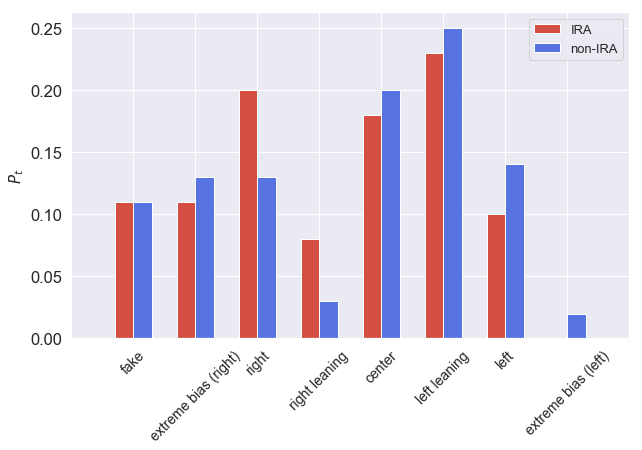

fake                    0.10
extreme bias (right)    0.03
right                   0.32
right leaning           0.02
center                  0.17
left leaning            0.31
left                    0.05
extreme bias (left)     0.00
Name: Ps, dtype: float64
fake                    0.13
extreme bias (right)    0.12
right                   0.11
right leaning           0.04
center                  0.20
left leaning            0.23
left                    0.15
extreme bias (left)     0.02
Name: Ps, dtype: float64


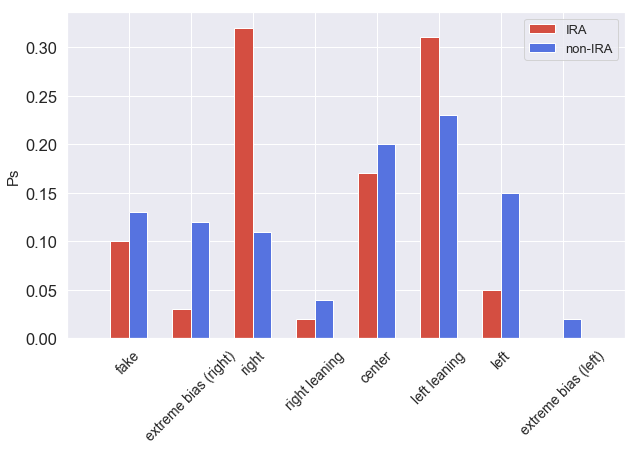

fake                    0.31
extreme bias (right)    0.09
right                   0.52
right leaning           0.08
center                  0.30
left leaning            0.43
left                    0.15
extreme bias (left)     0.13
Name: Ns/Nt, dtype: float64
fake                    0.36
extreme bias (right)    0.28
right                   0.27
right leaning           0.33
center                  0.31
left leaning            0.29
left                    0.35
extreme bias (left)     0.28
Name: Ns/Nt, dtype: float64


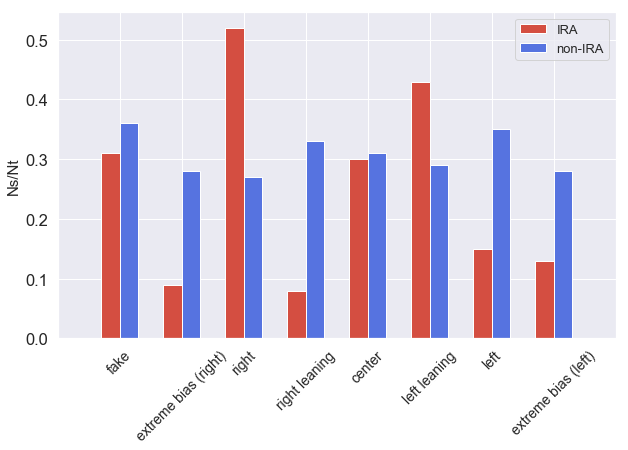

fake                    20.98
extreme bias (right)    23.44
right                   31.17
right leaning           11.89
center                  19.56
left leaning            24.87
left                    12.97
extreme bias (left)      2.50
Name: Nt/Nu, dtype: float64
fake                    16.09
extreme bias (right)    14.42
right                   10.20
right leaning            3.85
center                   6.22
left leaning             6.15
left                     6.66
extreme bias (left)      6.22
Name: Nt/Nu, dtype: float64


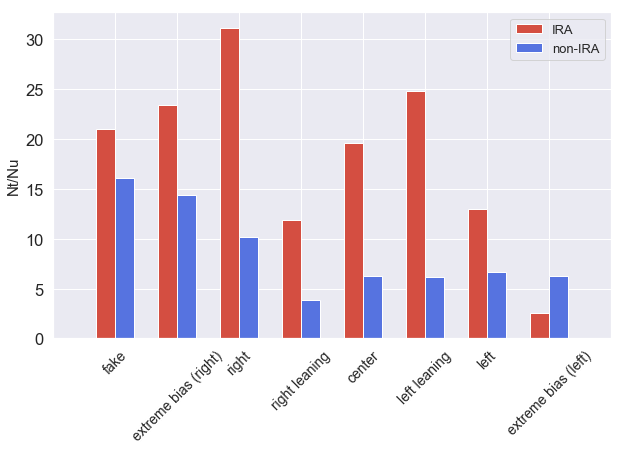

fake                    17.13
extreme bias (right)     5.23
right                   39.91
right leaning            4.95
center                  16.20
left leaning            29.10
left                     6.31
extreme bias (left)      1.27
Name: Ns/Nsu, dtype: float64
fake                    14.92
extreme bias (right)    11.94
right                    8.22
right leaning            4.15
center                   7.43
left leaning             5.80
left                     6.71
extreme bias (left)      4.87
Name: Ns/Nsu, dtype: float64


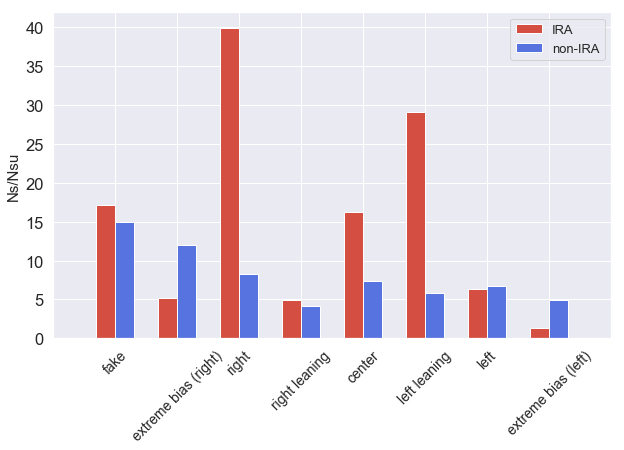

In [135]:
plot_compare("Pt")
plot_compare("Ps")
plot_compare("Ns/Nt")
plot_compare("Nt/Nu")
plot_compare("Ns/Nsu")

## 四个重要的社团，看看是否有针对性？

results from interaction_with_ira.ipynb

In [3]:
comm = json.load(open("data/louvain_rst_4.json"))
# comm = json.load(open("data/ira-ret-community.json"))

,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,3035977,0.21,821515,0.27,0.25,84928,35.75,35331,23.25
extreme bias (right),3567019,0.25,849652,0.24,0.26,89804,39.72,37408,22.71
right,3203482,0.22,660018,0.21,0.20,94619,33.86,39330,16.78
right leaning,541224,0.04,113050,0.21,0.03,69048,7.84,20342,5.56
center,1781173,0.12,300807,0.17,0.09,89974,19.80,31335,9.60
left leaning,1517472,0.11,304905,0.20,0.09,86368,17.57,30526,9.99
left,647300,0.05,167272,0.26,0.05,56284,11.50,18077,9.25
extreme bias (left),89814,0.01,22022,0.25,0.01,10397,8.64,3336,6.60


114434 114


,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,2429,0.17,600,0.25,0.12,72,33.74,44,13.64
extreme bias (right),2796,0.20,239,0.09,0.05,69,40.52,40,5.98
right,2770,0.20,358,0.13,0.07,84,32.98,50,7.16
right leaning,581,0.04,170,0.29,0.03,56,10.38,30,5.67
center,2223,0.16,1414,0.64,0.28,93,23.90,62,22.81
left leaning,2938,0.21,2253,0.77,0.44,89,33.01,65,34.66
left,307,0.02,90,0.29,0.02,52,5.90,25,3.60
extreme bias (left),16,0.00,2,0.12,0.00,8,2.00,2,1.00


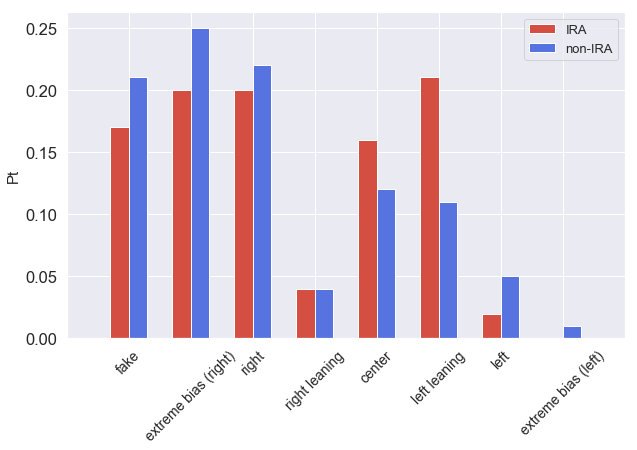

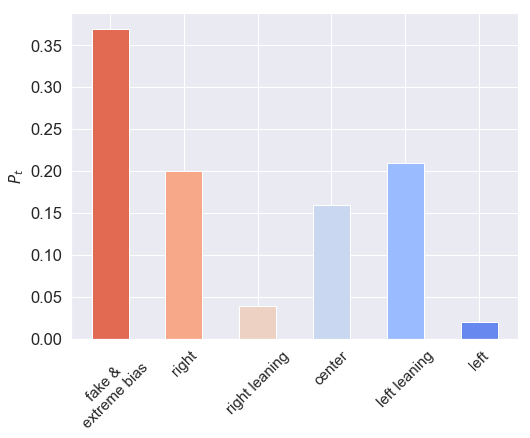

In [137]:
plot_community(0)

,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,54057,0.03,24863,0.46,0.03,2703,20.00,1207,20.60
extreme bias (right),67780,0.04,32543,0.48,0.04,3342,20.28,1578,20.62
right,99523,0.06,52727,0.53,0.06,5017,19.84,2500,21.09
right leaning,43974,0.03,23513,0.53,0.03,4821,9.12,2278,10.32
center,390683,0.23,198006,0.51,0.24,10385,37.62,4964,39.89
left leaning,540695,0.31,233594,0.43,0.28,11817,45.76,6278,37.21
left,445737,0.26,221026,0.50,0.27,9447,47.18,5002,44.19
extreme bias (left),82102,0.05,34323,0.42,0.04,3305,24.84,1421,24.15


15364 166


,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,449,0.04,308,0.69,0.26,56,8.02,9,34.22
extreme bias (right),79,0.01,5,0.06,0.00,47,1.68,5,1.00
right,227,0.02,26,0.11,0.02,71,3.20,15,1.73
right leaning,1549,0.15,12,0.01,0.01,95,16.31,6,2.00
center,2687,0.25,63,0.02,0.05,121,22.21,26,2.42
left leaning,3287,0.31,475,0.14,0.41,123,26.72,22,21.59
left,2263,0.21,271,0.12,0.23,113,20.03,35,7.74
extreme bias (left),92,0.01,12,0.13,0.01,34,2.71,9,1.33


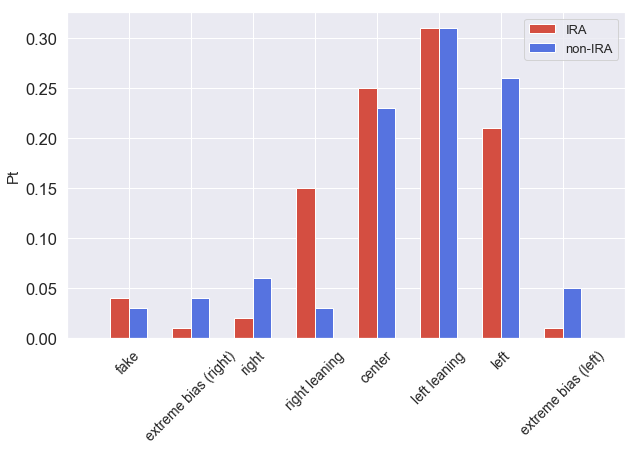

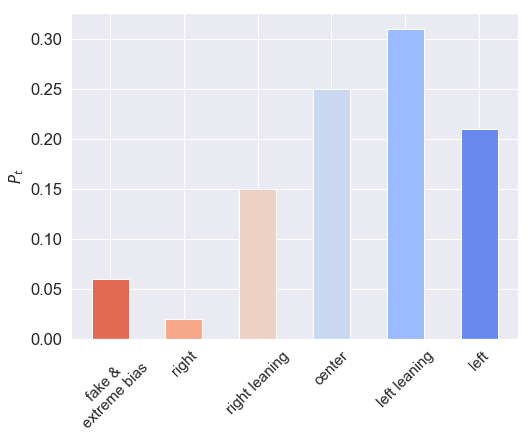

In [138]:
plot_community(1)

,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,18887,0.08,6904,0.37,0.10,879,21.49,398,17.35
extreme bias (right),23542,0.10,8483,0.36,0.12,1000,23.54,478,17.75
right,22320,0.09,5893,0.26,0.08,1357,16.45,692,8.52
right leaning,7070,0.03,2802,0.40,0.04,1111,6.36,476,5.89
center,43851,0.18,10692,0.24,0.15,2314,18.95,1114,9.60
left leaning,66773,0.28,19690,0.29,0.27,2614,25.54,1355,14.53
left,48468,0.20,14923,0.31,0.21,1906,25.43,1015,14.70
extreme bias (left),10468,0.04,2864,0.27,0.04,704,14.87,272,10.53


3640 57


,Nt,Pt,Ns,Ns/Nt,Ps,Nu,Nt/Nu,Nsu,Ns/Nsu
fake,17,0.07,0,0.00,0.0,10,1.70,0,NaN
extreme bias (right),8,0.03,2,0.25,0.2,7,1.14,2,1.0
right,17,0.07,1,0.06,0.1,15,1.13,1,1.0
right leaning,23,0.09,0,0.00,0.0,21,1.10,0,NaN
center,66,0.26,1,0.02,0.1,37,1.78,1,1.0
left leaning,64,0.25,4,0.06,0.4,37,1.73,4,1.0
left,57,0.22,2,0.04,0.2,36,1.58,2,1.0
extreme bias (left),2,0.01,0,0.00,0.0,2,1.00,0,NaN


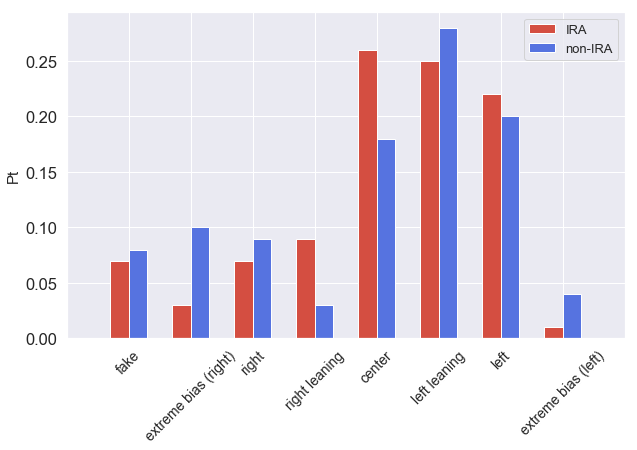

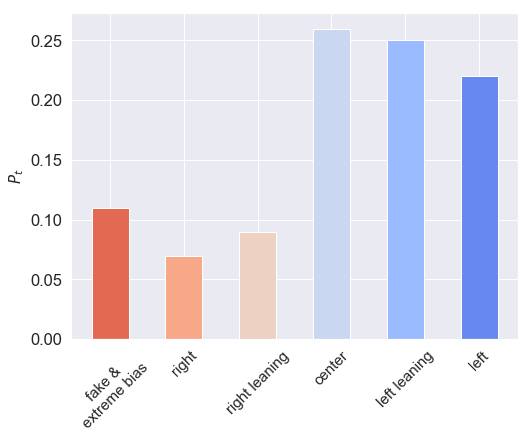

In [139]:
plot_community(3)

## top 25 sources and retweeers

In [142]:
for lab in labels:
    d = IRA_users.sort_values(lab + "_source", ascending=False)
    d = d[[lab, lab + "_source"]].head(25)
    # display(d)
    d.to_csv(f"data/IRA_{lab}_originators_top25.csv")

In [ ]:
for lab in labels:
    _d = IRA_users[lab] - IRA_users[lab + "_source"]
    IRA_users[lab + "_retweet"] = _d
    _d = IRA_users.sort_values(lab + "_retweet", ascending=False)
    # display(d)
    _d[[lab, lab + "_retweet"]].head(25).to_csv(f"data/IRA_{lab}_retweeters_top25.csv")

## 说了这么多left的东西，究竟在说什么？

black and other negative emotion!

In [46]:
left_tweetids = set()

for line in tqdm(open("disk/all_IRA_tweets.json")):
    d = json.loads(line.strip())
    if d["c_mbfc"] == "left leaning":
        left_tweetids.add(d["tweetid"])

In [86]:
ira_data = pd.read_csv("data/ira-tweets-ele.csv", usecols=["tweetid", "tweet_text"], dtype=str)

In [93]:
cnt = 0
w_cnt = Counter()
with open("data/ira-left-text.txt", "w") as f:
    for i, row in tqdm(ira_data.iterrows()):
        if row["tweetid"] in left_tweetids and not row["tweet_text"].startswith("RT"):
            f.write(row["tweet_text"] + "\n")

## IRAs as sources

1. 看看每个用户发布的量
2. 找到top sources看看交集

结论：IRA从量上来看伪装非常普通的用户！

用户发帖量的分布 或 用户发source tweets的分布

fake


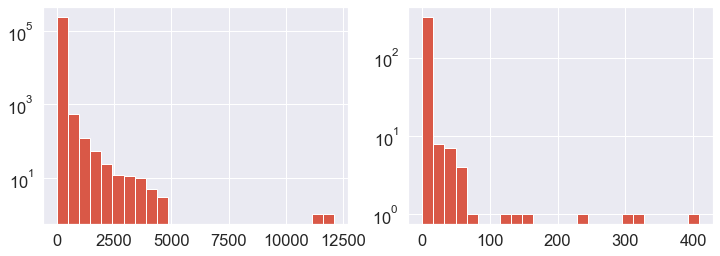

extreme bias (right)
right
right leaning
center
left leaning
left
extreme bias (left)


In [75]:
sns.set_style("darkgrid")

for lab in labels:
    print(lab)
    
    plt.figure(figsize=(12, 4))
    
    ax = plt.subplot(121)
    _users = all_users[all_users[lab] > 0]
    _users[lab].hist(ax=ax, bins=25)
    # USER_TABLE[lab] = _users[lab].describe()
    
    plt.yscale("log")
    # plt.xscale("log")
    
    ax = plt.subplot(122)
    IRA_users[lab].hist(ax=ax, bins=25)
    # IRA_USER_TABLE[lab] = IRA_users[lab].describe()
    
    plt.yscale("log")
    
    if lab == "fake":
        plt.show()
    plt.close()

### 从量的角度看IRA的确不高，甚至低于一般的用户

In [55]:
set_IRAs_users = set()

for user_id, row in IRA_users.iterrows():
    set_IRAs_users.add(user_id)
    
# print(len(set_IRAs_users))

In [35]:
top_num = 5000

for lab in labels:
    top_sources = set(all_users[lab].sort_values(ascending=False).head(top_num).index)
    # print(top_sources)
    len_intersection = len(top_sources & set_IRAs_users)
    print(lab, len_intersection)

fake 3
extreme bias (right) 5
right 6
right leaning 28
center 2
left leaning 3
left 0
extreme bias (left) 0


In [37]:
top_num = 5000

for lab in labels:
    top_sources = set(all_users[lab + "_source"].sort_values(ascending=False).head(top_num).index)
    # print(top_sources)
    len_intersection = len(top_sources & set_IRAs_users)
    print(lab, len_intersection)

fake 2
extreme bias (right) 1
right 4
right leaning 2
center 3
left leaning 7
left 1
extreme bias (left) 0


In [3]:
def get_cdf_pdf(data, mini=0, maxi=0, step=0, norm=True, scale=False):
    if scale:
        data = data.apply(np.log10)
    
    if maxi == 0:
        maxi = data.max()
    if step == 0:
        try:
            step = int((maxi - mini) / 50)
            if step == 0:
                step = 1
        except:
            step = 1
            
    print(mini, maxi, step)
    x = np.arange(mini, maxi, step, dtype=int)
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    x = pd.Series(x)
    cdf = pd.Series(cdf)
    pdf = pd.Series(pdf)
    
    return x, cdf, pdf

for label in labels:
    for dire in ["out", "in"]:
        x, cdf, pdf = get_cdf_pdf(dict_CI[label][dire + "_All dist"], scale=True) 
        plt.plot(x, cdf, color=all_c, label="All users", lw=2)
        x, cdf, pdf = get_cdf_pdf(dict_CI[label][dire + "_IRA dist"], scale=True)
        plt.plot(x, cdf, color=ira_c, label="IRA", lw=2)
        print("CI score\n category:{}\ndirection:{}".format(label, dire))
        plt.yscale("log")
        plt.ylabel("CCDF"); plt.xlabel("CI score")
        plt.legend()
        plt.show(); plt.close()

## IRAs as supporters 

In [ ]:
from collections import Counter
sns.color_palette("RdBu", n_colors=7)

count = Counter(first_opinion)
print(count)

label = ["pro-hillary", "pro-trump"]
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('First source', fontsize=15)
plt.ylabel('Number of tweets', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

count = Counter(staters_opinion)
print(count)

plt.subplot(132)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('source', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

count = Counter(other_opinion)
print(count)

plt.subplot(133)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('non-source', fontsize=15)
# plt.ylabel('N of fake sources', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

plt.savefig("fig/support.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# 分析社团中的支持者 for Trump OR Clinton

In [6]:
comm_1 = []
comm_2 = []
comm_3 = []

for uid, c in comm.items():
    if c == 0:
        comm_1.append(uid)
    elif c == 1:
        comm_2.append(uid)
    elif c == 3:
        comm_3.append(uid)
        
len(comm_1), len(comm_2), len(comm_3)

(137953, 31940, 9624)

In [16]:
user_support = json.load(open("disk/user_hillary_trump.json"))
len(user_support)

10941026

In [15]:
users_opinion = {}
opinion = Counter()

for uid, v in tqdm(user_support.items()):
    if v[0] > v[1]:
        users_opinion[uid] = "C"
        opinion["C"] += 1
    elif v[0] < v[1]:
        users_opinion[uid] = "T"
        opinion["T"] += 1
    else:
        users_opinion[uid] = "U"
        opinion["U"] += 1
        
opinion

Counter({'T': 3023112, 'C': 7113057, 'U': 804857})

In [18]:
def get_comm_opinion(c):
    opi = Counter()
    for _uid in c:
        if _uid in users_opinion:
            opi[users_opinion[_uid]] += 1
    return opi

Counter({'T': 115390, 'C': 16629, 'U': 2422})

In [19]:
get_comm_opinion(comm_1)

Counter({'T': 115390, 'C': 16629, 'U': 2422})

In [20]:
get_comm_opinion(comm_2)

Counter({'T': 4274, 'C': 19901, 'U': 1031})

In [21]:
get_comm_opinion(comm_3)

Counter({'T': 1862, 'C': 5311, 'U': 395})

# 网络分析

分析每种媒体网络中IRA的节点数量，相关边的数量，平均度，最大度等。

In [6]:
labels = [
    "fake",
    "extreme bias (right)",
    "right",
    "right leaning",
    "center",
    "left leaning",
    "left",
    "extreme bias (left)",
    "local"
]

In [7]:
from fake_identify import Are_you_IRA

putin = Are_you_IRA()

def get_G_char(g_file):
    print(g_file, "...")
    G = nx.read_gpickle(g_file)
    
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    k = G.number_of_edges() / G.number_of_nodes()

    out_d = pd.Series([k[1] for k in G.out_degree()])
    # print(out_d)
    ave_out_d = out_d.mean()
    std_out_d = out_d.std() / k
    max_out_d = out_d.max()

    in_d = pd.Series([k[1] for k in G.in_degree()])
    # print(in_d)
    ave_in_d = in_d.mean()
    std_in_d = in_d.std() / k
    max_in_d = in_d.max()

    return {
        "N nodes": int(n_nodes),
        "N edges": int(n_edges),
        "<k>": k,
        "std(k_out) / <k>": std_out_d,
        "std(k_in) / <k>": std_in_d,
        "max(k_out)": int(max_out_d),
        "max(k_in)": int(max_in_d),
    }        


def get_G_char_IRA(g_file):
    print(g_file, "...")
    G = nx.read_gpickle(g_file)
    nodes = [uid for uid in putin.IRA_user_set if G.has_node(uid)]
    
    n_nodes = len(nodes)
    
    cover_set = set()
    for n in nodes:
        for _n in G[n]:
#             if putin.fuck(_n):
#                 continue
            cover_set.add(_n)
            
    out_d = pd.Series([G.out_degree(n) for n in nodes])
    ave_k_out = out_d.sum() / n_nodes
    std_k_out = out_d.std() / ave_k_out
    max_out_d = out_d.max()

    in_d = pd.Series([G.in_degree(n) for n in nodes])
    ave_k_in = in_d.sum() / n_nodes
    std_k_in = in_d.std() / ave_k_in
    max_in_d = in_d.max()
    
    return {
        "N nodes": int(n_nodes),
        "<k_out>": ave_k_out,
        "<k_in>": ave_k_in,
        "std(k_out) / <k_out>": std_k_out,
        "std(k_in) / <k_in>": std_k_in,
        "N cover": len(cover_set),
        "max(k_out)": int(max_out_d),
        "max(k_in)": int(max_in_d),
    }


In [8]:
networks_char = {}

for category in labels:
    rst = get_G_char("disk/network/{}.gpickle".format(category))
    networks_char[category] = rst

disk/network/fake.gpickle ...
disk/network/extreme bias (right).gpickle ...
disk/network/right.gpickle ...
disk/network/right leaning.gpickle ...
disk/network/center.gpickle ...
disk/network/left leaning.gpickle ...
disk/network/left.gpickle ...
disk/network/extreme bias (left).gpickle ...
disk/network/local.gpickle ...


In [9]:
networks_char = pd.DataFrame(networks_char).round(1).transpose()
networks_char = networks_char[["N nodes", "N edges", "<k>", "std(k_out) / <k>", "std(k_in) / <k>", "max(k_out)", "max(k_in)"]]
networks_char = networks_char.astype({
    "N nodes": int,
    "N edges": int,
    "max(k_out)": int,
    "max(k_in)": int,
})

networks_char.to_csv("data/table_all_network.csv", float_format="%.1f")
networks_char

,N nodes,N edges,<k>,std(k_out) / <k>,std(k_in) / <k>,max(k_out),max(k_in)
fake,207591,1583697,7.6,29.6,2.7,45449,1234
extreme bias (right),267918,1904513,7.1,38.0,2.8,60622,642
right,381786,2131027,5.6,48.1,2.8,87229,546
right leaning,254312,631580,2.5,50.0,1.8,38994,147
center,975548,2961319,3.0,122.6,2.8,257580,551
left leaning,1196330,4340759,3.6,73.5,3.5,172056,942
left,587617,2078855,3.5,50.4,3.6,59759,797
extreme bias (left),83672,299399,3.6,33.8,2.5,23210,659
local,96229,141610,1.5,24.8,1.1,5772,119


In [10]:
networks_char = {}

for category in labels:
    rst = get_G_char_IRA("disk/network/{}.gpickle".format(category))
    networks_char[category] = rst

disk/network/fake.gpickle ...
disk/network/extreme bias (right).gpickle ...
disk/network/right.gpickle ...
disk/network/right leaning.gpickle ...
disk/network/center.gpickle ...
disk/network/left leaning.gpickle ...
disk/network/left.gpickle ...
disk/network/extreme bias (left).gpickle ...
disk/network/local.gpickle ...


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars


In [11]:
networks_char = pd.DataFrame(networks_char).round(1).transpose()
networks_char = networks_char[["N nodes", "<k_out>", "<k_in>", "std(k_out) / <k_out>", "std(k_in) / <k_in>", "max(k_out)", "max(k_in)"]]
networks_char = networks_char.astype({
    "N nodes": int,
    "max(k_out)": int,
    "max(k_in)": int,
})

networks_char.to_csv("data/table_IRA_network.csv", float_format="%.1f")
networks_char

,N nodes,<k_out>,<k_in>,std(k_out) / <k_out>,std(k_in) / <k_in>,max(k_out),max(k_in)
fake,127,22.3,10.4,4.1,2.4,716,205
extreme bias (right),117,17.5,14.2,4.2,2.4,563,250
right,152,18.9,11.2,5.4,2.7,864,253
right leaning,164,2.6,3.7,5.1,1.9,107,68
center,228,4.3,7.8,6.7,1.5,310,128
left leaning,228,6.5,10.2,4.7,1.3,270,142
left,186,2.5,8.4,6.8,1.0,154,60
extreme bias (left),37,0.0,1.9,NaN,0.9,0,8
local,141,4.1,3.1,4.3,0.9,143,20
